# Pollution Data Time Series Analysis Using ARIMA



Importing Libraries

In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

1. Dataset Preparation

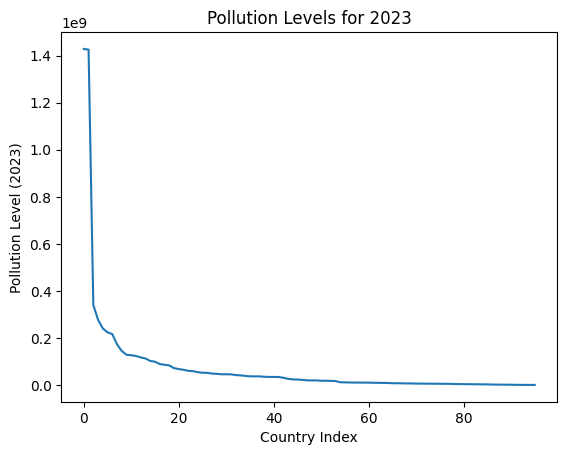

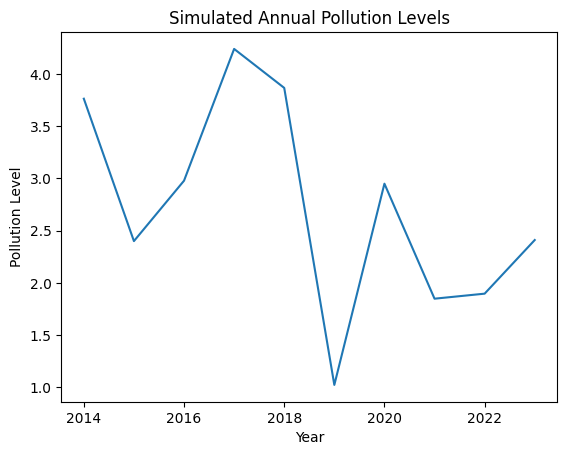

In [11]:
#Load Dataset
data = pd.read_csv('most-polluted-countries.csv')

pollution_2023 = data['pollution_2023']
pollution_growth_rate = data['pollution_growth_Rate']

# Plot the pollution levels for 2023
plt.plot(pollution_2023.index, pollution_2023.values)
plt.xlabel('Country Index')
plt.ylabel('Pollution Level (2023)')
plt.title('Pollution Levels for 2023')
plt.show()

#Time index simulated
years = np.arange(2014, 2024)
trend = 2

seasonal_amplitude = 2
seasonal_period = 1
seasonal = seasonal_amplitude * np.sin(2 * np.pi * years / seasonal_period)

np.random.seed(0)
noise = np.random.normal(0, 1, len(years))
pollution_levels = trend + seasonal + noise
simulated_data = pd.DataFrame({'Year': years, 'Pollution': pollution_levels})

# Plot the simulated time series data
plt.plot(simulated_data['Year'], simulated_data['Pollution'])
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.title('Simulated Annual Pollution Levels')
plt.show()

2. Stationarity Testing

In [12]:
# Perform Augmented Dickey-Fuller test
result = adfuller(data['pollution_2023'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

# Implications of test results
if result[1] <= 0.05:
    print("Reject the null hypothesis. Time series is stationary.")
else:
    print("Fail to reject the null hypothesis. Time series may not be stationary.")

ADF Statistic: -3.300734202893016
p-value: 0.01484568748394119
Critical Values:
	1%: -3.5117123057187376
	5%: -2.8970475206326833
	10%: -2.5857126912469153
Reject the null hypothesis. Time series is stationary.


3. ARIMA Model Identification

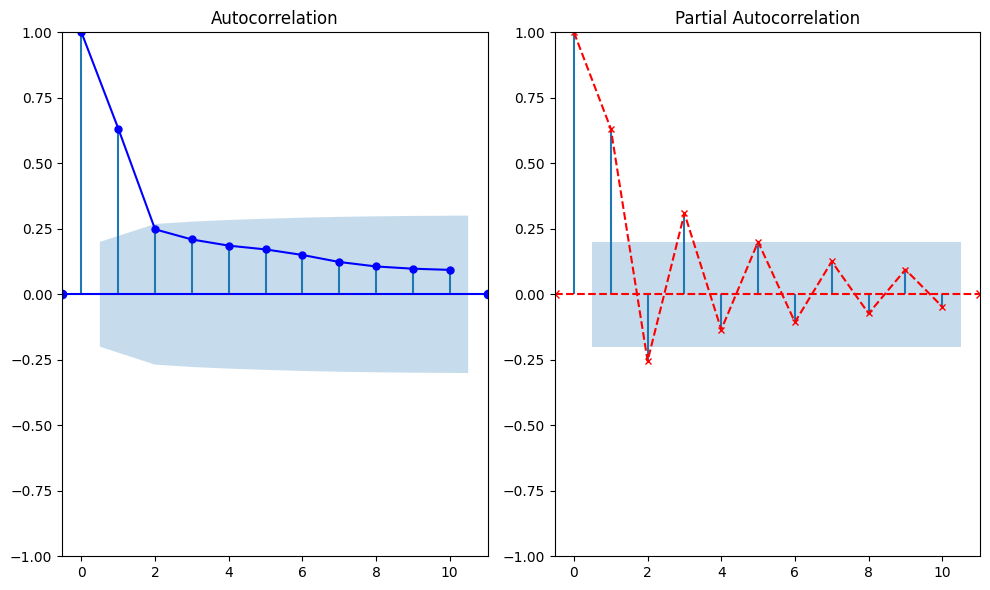

In [13]:
pollution_levels = data['pollution_2023']

#Parameters
plot_params_acf = {'lags': 10, 'marker': 'o', 'linestyle': '-', 'color': 'blue'}
plot_params_pacf = {'lags': 10, 'marker': 'x', 'linestyle': '--', 'color': 'red'}

# Plots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

#Autocorrelation Function (ACF)
axes[0].set_title("Autocorrelation Function (ACF)")
plot_acf(pollution_levels, ax=axes[0], **plot_params_acf)

#Partial Autocorrelation Function (PACF)
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plot_pacf(pollution_levels, ax=axes[1], **plot_params_pacf)
plt.tight_layout()
plt.show()

4. ARIMA Model Fitting

In [14]:
# Fit ARIMA model
model = ARIMA(data['pollution_2023'], order=(1, 0, 1))
result = model.fit()

# Evaluate model's fit
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -19209.350
Date:                Fri, 29 Mar 2024   AIC                          38426.699
Time:                        06:26:27   BIC                          38436.957
Sample:                             0   HQIC                         38430.845
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.405e+07   3.83e-14   1.93e+21      0.000    7.41e+07    7.41e+07
ar.L1          0.9999   1.85e-05   5.41e+04      0.000       1.000       1.000
ma.L1          0.0608      0.006     10.108      0.0

5. Forecasting

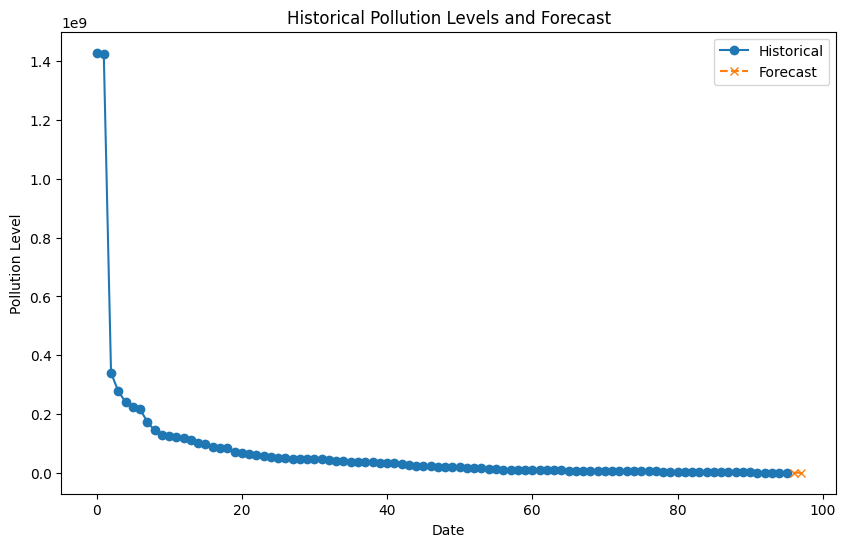

In [15]:
# Forecasting
forecast_steps = 2
forecast = result.forecast(steps=forecast_steps)

# Plot the forecasted pollution levels along with the actual data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pollution_2023'], linestyle='-', label='Historical', marker='o')
plt.plot(forecast.index, forecast, linestyle='--', label='Forecast', marker='x')

plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Historical Pollution Levels and Forecast')
plt.legend()

# Display the plot
plt.show()

6. Report and Insights

**Lower Pollution Levels**

The analysis suggests a significant decrease in pollution over the next 2 years. This is fantastic news for our health and the environment.


This forecast isn't just about predicting the future; it's about shaping it for the better. This information empowers policymakers and environmentalists to:
- Develop Targeted Strategies: Knowing pollution levels are expected to drop allows for more focused plans to tackle remaining sources.
- Protect Ecosystems: Cleaner air means a healthier environment for plants and animals. This forecast can guide conservation efforts.
- Improve Overall Environmental Health: Lower pollution benefits everything from our lungs to our water sources. This information can be used to create a more sustainable future.